<a href="https://colab.research.google.com/github/vicentemaartinez/Tarea-3/blob/main/Tarea3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a target="_blank" href="https://colab.research.google.com/github/AsCiDEN/Tarea-3/blob/main/Tarea3.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# **CD2201-16: Ciencia de Datos en Astronomía**

**Profesores:** Boris Cuevas, Paula Díaz, Danilo Sepúlveda, Francisco Urbina

# **Tarea 3: Ajuste de modelos**

El objetivo de esta tarea es ajustar diferentes modelos a las curvas de rotación de galaxias y, evaluando con las métricas presentadas en clases, concluír que la materia oscura es capaz de explicar la fenomenología descrita por las observaciones.

## **¿Materia oscura o solo materia luminosa?**

La curva de rotación de una galaxia es la velocidad a la cual sus estrellas o gas rota en torno a su centro como función de la distancia. Asumiendo movimiento circular y la ley de Gravitación de Newton, se puede obtener la siguiente fórmula para la curva de rotación (o ecuación de movimiento):

\begin{equation}
\tag{1}
a_c(R) = \frac{v^2(R)}{R} = \frac{G M(r\leq R)}{R^2} \implies v(R) = \sqrt{\frac{GM(r\leq R)}{R}},
\end{equation}

donde  $G$ es la constante de gravitación universal, y
\begin{equation}
\tag{2}
M(R) = M(r\leq R)= 4\pi \int_{0}^R \rho(r)r^2 dr,
\end{equation}
es decir, es la masa encerrada en una esfera de radio $R$ para una densidad de masa volumétrica $\rho(r)$.

Bajo esta ecuación, si conocemos la curva de rotación $v(R)$ de una galaxia, podemos inferir su distribución de masa y vice versa.

Una forma de obtener $M(R)$ es asumiendo que la masa de las galaxias está dominada por su componente estelar, y por ende, que existe una relación de proporcionalidad entre perfil de masa galáctico y el perfil luminoso de cada galaxia, esto ha llevado a proponer perfiles de tipo exponenciales (o de Sérsic) de la forma:

\begin{equation}
\tag{3}
M_{star}(R, M_1, R_1) = M_1 \times \left[1 - \frac{\exp(-R/R_1)(R_1 + R)}{R_1} \right]
\end{equation}

Note que este perfil depende de dos parámetros que caracterizan la masa ($M_1$) y el tamaño típico ($R_1$) de la galaxia de estudio.

1.   Para esta parte de la tarea será necesario trabajar con unidades, en particular, para distancias galácticas la unidad más típica es el kilo-parsec. Defina que es un kilo-parsec (kpc) y muestre su equivalencia en metros. ¿Cuántos planeta Tierra puede colocar uno al lado del otro dentro de 1 kpc de distancia?

**Respuesta:** Un kilo-parsec corresponde lógicamente a 1000 parsec, que se  define como la distancia a la que habría que observar el radio de rotación terrestre para que equivalga a un ángulo de 1 segundo de arco, lo que corresponde a $3.086 \cdot 10^{19}$ metros o $2.37 \cdot 10^{9 }$ Tierras puestas una al lado de la otra.

2. Grafique la curva de velocidad $v(R)$ para la distribución de masa dada en la ecuación (3). Para ello considere $M_1 = 10^{10} M_{\odot}$ y $R_1 = 5 $ kpc, donde $M_\odot \approx 1.989\times 10^{30}$ kg es la masa del sol.

**Nota:** Para esta tarea puede utilizar el módulo [astropy.units](https://docs.astropy.org/en/stable/units/) para lidiar fácilmente con las unidades. Esto es completamente opcional, no se asignará puntaje extra si es que lo hacen, pero puede investigarlo si así lo desea. Tampoco se descontará en caso contrario.

In [273]:
import numpy as np
import matplotlib.pyplot as plt

# Constante de gravitación universal
G = 6.67 * 10**(-11)
# Usaremos lo siguiente para convertir valores en kpc a metros
kpc_to_m = 3.086 * 10**(19)
# Usaremos lo siguiente para expresar masa en masas solares
solar_masses_to_kg = 1.989 * 10**(30)

In [274]:
# Definimos M1
M1 = 10**10 * solar_masses_to_kg
# Definimos R1
R1 = 5

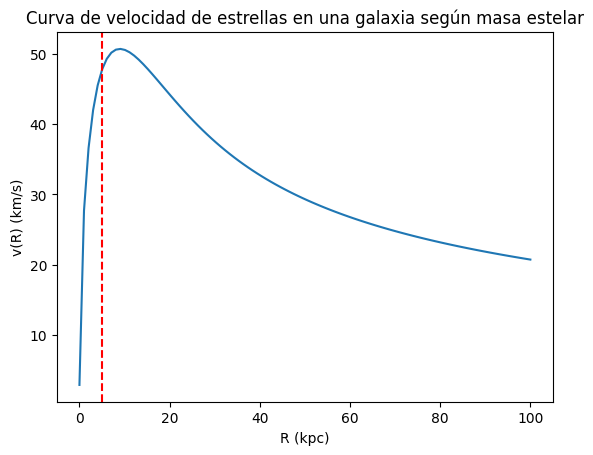

In [292]:
# Definimos M_star como lo indica la ecuación (3)
def M_star(R, M1, R1):
    return M1 * (1 - np.exp(-R / R1) * (R1 + R) / R1)

# Creamos la función v_R_stars reemplazando la ecuación (3) en (1).
def v_R_stars(R, M1, R1):
    return np.sqrt(G * M_star(R, M1, R1) / (R * kpc_to_m)) / 1000  # Dividimos para pasar de metros a kilómetros

# Creamos el arreglo R
R = np.linspace(0.01, 100, 100)

# Calculamos la velocidad de las estrellas de una galaxia con las condiciones M1 y R1
v_r_stars = v_R_stars(R, M1, R1)

# Hacemos el gráfico
plt.plot(R, v_r_stars)

# Añadimos nombre a los ejes
plt.xlabel('R (kpc)')
plt.ylabel('v(R) (km/s)')
plt.title('Curva de velocidad de estrellas en una galaxia según masa estelar')

# Especificamos donde está R1
plt.axvline(R1, color = 'r', linestyle = '--')

# Mostramos el gráfico
plt.show()

3. ¿Qué puede decir del comportamiento de $v(R)$ para $R \gg R_1$? Aproxime $M(R)$ en dicho caso e indique la forma que tendrá $v(R)$.

**Respuesta:** Si $R \gg R_1$ entonces la exponencial presente en la función tiende a 0, y por ende el paréntesis queda solo con el 1, así entonces $M_{star}(R, M_1, R_1) \approx M_1 [1 - \frac{0}{R_1}] = M_{1}$, luego $v(R) = \sqrt{\frac{GM_{1}}{R}}$, como $G$ y $M_{1}$ son constantes, $v(R) \sim \sqrt{\frac{1}{R}}$, por lo cual, $v(R)$ sería una función que decrece exponencialmente y converge a 0.

 Note que dicha curva tiene la misma forma que la [curva de rotación de los planetas en el sistema solar!](https://sites.temple.edu/profnewby/2019/05/04/solar-system-rotation-curve/)

En 1978, la astrónoma Vera Rubin descubrió que, para distancias grandes, la curva de rotación no seguía la forma predicha por los típicos perfiles de masa (como aquel que usted describió en la parte anterior).

Una forma de resolver este misterio es incorporando un segundo elemento que está aportando de forma considerable a la distribución de materia, pero que aparentemente no emite ni absorbe nada de luz, apodado como **materia oscura**.

En 1997, Julio Navarro, Carlos Frenk y Simon White publicaron [un artículo científico](https://iopscience.iop.org/article/10.1086/304888/pdf) en el cual proponían un perfil de densidad $\rho(r)$ para la materia oscura a partir de resultados de simulaciones numéricas. Este perfil de densidad permite obtener la masa encerrada en un radio $R$ de la forma:

\begin{equation}
\tag{4}
M_{dm}(R, M_0, R_0) = M_0 \times \left[\ln\left(\frac{R_0 + R}{R_0}\right)  + \frac{R_0}{R_0 + R} - 1\right]
\end{equation}

4. Añada al gráfico anterior la curva de rotación dada por perfil de la ecuación (4) considerando $M_0 = 5\times 10^{10} M_{\odot}$, y $R_0 = 20$ kpc, recuerde añadir una leyenda adecuada que permita identificar ambos perfiles.


In [276]:
# Definimos M0
M0 = 5 * 10**10 * solar_masses_to_kg
# Definimos R0
R0 = 20

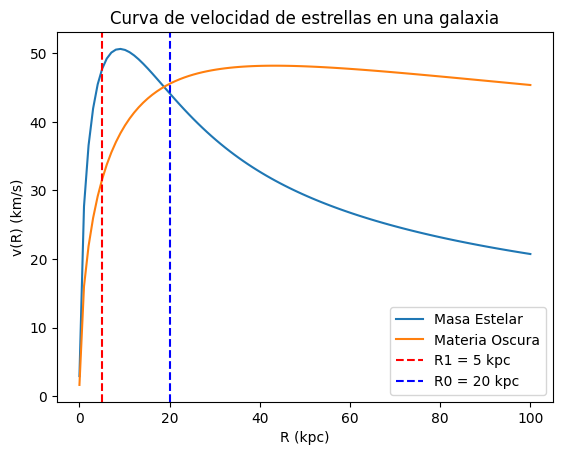

In [277]:
# Definimos función M_dm como describe la ecuación (4)
def M_dm(R, M0, R0):
    return M0 * (np.log((R0 + R) / R0) + (R0 / (R0 + R)) - 1)

# Creamos la función v_R_dm reemplazando la ecuación (4) en (1)
def v_R_dm(R, M0, R0):
    return np.sqrt(G * M_dm(R, M0, R0) / (R * kpc_to_m)) / 1000

# Calculamos la velocidad de las estrellas de una galaxia con las condiciones M0 y R0 de materia oscura
v_r_dm = v_R_dm(R, M0, R0)

# Hacemos el gráfico
plt.plot(R, v_r_stars, label='Masa Estelar')
plt.plot(R, v_r_dm, label='Materia Oscura')

# Añadimos nombre a los ejes
plt.xlabel('R (kpc)')
plt.ylabel('v(R) (km/s)')
plt.title('Curva de velocidad de estrellas en una galaxia')

# Especificamos donde está R1 y R0
plt.axvline(R1, color='r', linestyle='--', label='R1 = 5 kpc')
plt.axvline(R0, color='b', linestyle='--', label='R0 = 20 kpc')

# Añadimos la leyenda
plt.legend()

# Mostramos el gráfico
plt.show()

5. ¿Qué componente parece dominar a distancias cortas? ¿Cuál a distancias largas?

**Respuesta (corta):** A distancias cortas parece dominar la masa estelar, mientras que a distancias largas domina claramente la materia oscura.

Es razonable pensar que uno necesita tanto el componente deducido por la masa estelar (o luminosa) como aquella que no interactúa con la luz (materia oscura), por lo que un perfil de masa más completo involucra una suma de cada componente tal como se describe en la siguiente ecuación:

\begin{equation}
\tag{5}
M_{tot}(R, M_0, R_0, M_1, R_1 ) =  M_{dm}(R,M_0, R_0) + M_{star}(R, M_1, R_1)
\end{equation}

Ahora analizaremos la curva de rotación de la [galaxía NGC 6503](https://es.wikipedia.org/wiki/NGC_6503), para ello cargaremos el archivo **velocity_curve_NGC6503.txt**.

Las columnas del archivo tienen la siguiente información, distancia del centro (en kpc), velocidad medida (en km/s) y el error estándar en la medición (en km/s).

In [278]:
# Montamos el drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [279]:
# Ruta hacia el archivo
path_archivo = '/content/drive/MyDrive/Colab Notebooks/tarea3mod/velocity_curve_NGC6503.txt'

# Abrimos el archivo
datos = np.loadtxt(path_archivo)

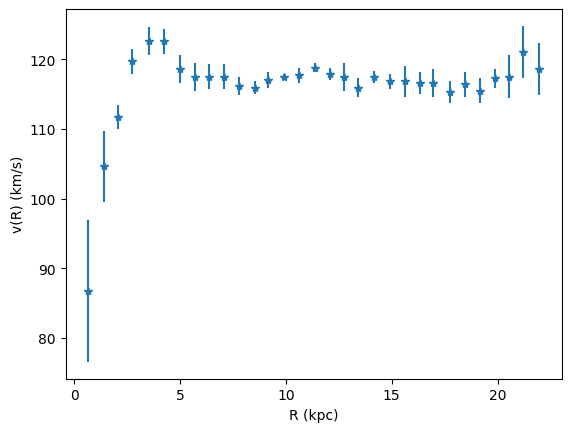

In [280]:
# Hacemos un gráfico de la curva añadiendo el error en cada punto
plt.errorbar(datos[:, 0], datos[:, 1], yerr=datos[:, 2], marker = '*', linestyle = '')

# Añadimos el nombre de los ejes
plt.xlabel('R (kpc)')
plt.ylabel('v(R) (km/s)')

# Mostramos el gráfico
plt.show()

Ajustaremos 3 modelos de curva de rotación para esta galaxia.

1. Solo componente estelar.
2. Solo materia oscura.
3. Componente estelar y materia oscura.

¿Es este un problema de ajuste de modelos lineal o no-lineal?

**Respuesta (una o dos palabras):** No-lineal

In [281]:
# Importamos curve_fit
from scipy.optimize import curve_fit

In [282]:
# Escribimos la función v_R_tot(R, M0, R0, M1, R1) que utiliza M_tot descrito en la ecuación (5).

def v_R_tot(R, M0, R0, M1, R1):
  return np.sqrt(G * (M_dm(R, M0, R0) + M_star(R, M1, R1)) / (R  * kpc_to_m)) / 1000 # Añadimos a v(R) ambas masas anteriores

# Usamos curve_fit para ajustar los 3 modelos anteriores, condiciones iniciales siguen la proporcionalidad de R0, R1, M0 y M1.
# Se utiliza la primera columna de datos como los valores de R, la segunda como velocidad y la tercera como error.

popt_stars, pcov_stars = curve_fit(v_R_stars, datos[:, 0], datos[:, 1], sigma=datos[:, 2], p0=[(1e10 + 1e11)/2 * solar_masses_to_kg, 6])

popt_dm, pcov_dm = curve_fit(v_R_dm, datos[:, 0], datos[:, 1], sigma=datos[:, 2], p0=[5*(1e10 + 1e11)/2 * solar_masses_to_kg, 12])

popt_tot, pcov_tot = curve_fit(v_R_tot, datos[:, 0], datos[:, 1], sigma=datos[:, 2], p0=[(1e10 + 1e11)/2 * solar_masses_to_kg, 6, 5*(1e10 + 1e11)/2 * solar_masses_to_kg, 12])

<ipython-input-277-dee5cd293bc9>:3: RuntimeWarning: invalid value encountered in log
  return M0 * (np.log((R0 + R) / R0) + (R0 / (R0 + R)) - 1)
<ipython-input-277-dee5cd293bc9>:7: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(G * M_dm(R, M0, R0) / (R * kpc_to_m)) / 1000
<ipython-input-282-e4c06df165fe>:4: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(G * (M_dm(R, M0, R0) + M_star(R, M1, R1)) / (R  * kpc_to_m)) / 1000 # Añadimos a v(R) ambas masas anteriores


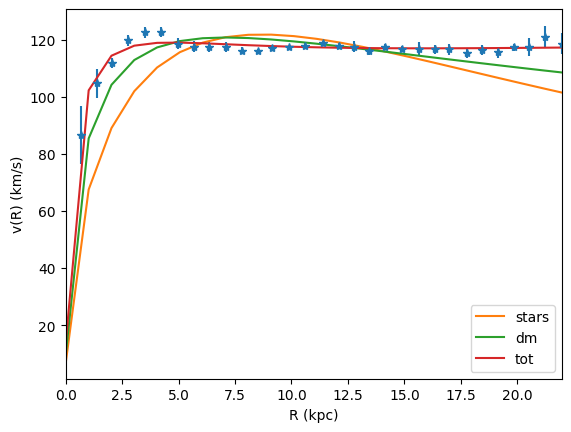

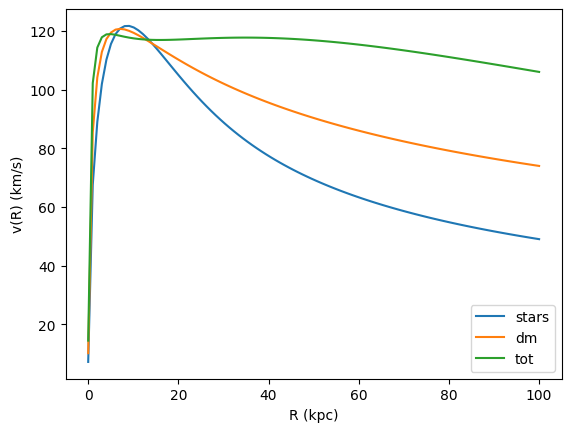

In [283]:
# Gráficamos en el gráfico de los datos anteriores los modelos con los párametros ideales.
plt.errorbar(datos[:, 0], datos[:, 1], yerr=datos[:, 2], marker='*', linestyle = '')
plt.plot(R, v_R_stars(R, *popt_stars), label='stars') # Usamos * para transponer el vector de parámetros
plt.plot(R, v_R_dm(R, *popt_dm), label='dm')
plt.plot(R, v_R_tot(R, *popt_tot), label='tot')
plt.xlabel('R (kpc)')
plt.ylabel('v(R) (km/s)')
plt.xlim(0, max(datos[:, 0])) # Como no tienen la misma extensión que los modelos lo limitamos hasta donde lleguen
plt.legend()
plt.show()

# Como tuvimos que limitar el eje en la anterior, grafiquemos igualmente todos los modelos por completo.
plt.plot(R, v_R_stars(R, *popt_stars), label='stars')
plt.plot(R, v_R_dm(R, *popt_dm), label='dm')
plt.plot(R, v_R_tot(R, *popt_tot), label='tot')
plt.xlabel('R (kpc)')
plt.ylabel('v(R) (km/s)')
plt.legend()
plt.show()

Evaluaremos cada modelo con la métrica $\chi ^2$ definida como:

$$\chi ^2 = \sum_{i=1}^N \frac{(y_i - v_R(x_i))^2}{\sigma_i^2}, $$

donde $y_i$ es el dato de la velocidad de rotación en la distancia $x_i$, cuyo error de medición es $\sigma_i$ y $v_R$ es el modelo respectivo.


In [284]:
# Evaluamos los datos en cada valor de x
pred_tot = v_R_tot(datos[:, 0], *popt_tot)
pred_dm = v_R_dm(datos[:, 0], *popt_dm)
pred_stars = v_R_stars(datos[:, 0], *popt_stars)

# Definimos la función chi_cuadrado como se dice anteriormente
def chi_cuadrado(datos, sigma, pred):
  return np.sum((datos - pred)**2 / sigma**2)

# Mostramos los resultados de chi__cuadrado para cada modelo.
print('Chi-cuadrado (dm+stars): ', chi_cuadrado(datos[:, 1], datos[:, 2], pred_tot))
print('Chi-cuadrado (dm-only): ', chi_cuadrado(datos[:, 1], datos[:, 2], pred_dm))
print('Chi-cuadrado (stars-only): ', chi_cuadrado(datos[:, 1], datos[:, 2], pred_stars))

Chi-cuadrado (dm+stars):  33.19549470761275
Chi-cuadrado (dm-only):  223.74106991140496
Chi-cuadrado (stars-only):  853.3934034312709


**Responda:**
1. ¿Qué modelo ajusta mejor los datos bajo la métrica anterior? ¿El peor?:
El modelo que mejor se ajusta es con claridad el que toma en cuenta tanto masa
estelar como materia oscura, mientras que el peor es el que solo toma en cuenta estrellas.
2. ¿Qué puede concluír de los constituyentes de la galaxia NGC6503?:
Se puede concluir que la galaxia NGC6503 posee componentes de masa estelar y materia oscura, incluso debido al error de los modelos podríamos concluir que hay más materia oscura que estrellas.

## **¿Cuántos parámetros utilizo?**

En el problema anterior el modelo que utilizamos tenía una motivación física, no estaba escogido "al azar". En esta parte trataremos de modelar algo del cual no tenemos una motivación física para proponer un modelo, en estos casos siempre debe primar el utilizar modelos sencillos por sobre modelos de alta complejidad o con muchos parámetros. En particular, ajustaremos polinomios de distinto grado y determinaremos el grado óptimo del modelo tal que su capacidad predictiva no se vea alterada.

Partiremos por generar los datos.

Considere la siguiente función:

$$f(x) = 5\sin(x) + 5\cos(x^2) + 3$$

Le añadiremos ruido utilizando una distribución normal $N(\mu= 0, \sigma=2)$.

In [285]:
np.random.seed(123)

**Responda:**
- ¿Qué hace la línea de código anterior? ¿Por qué es una buena práctica utilizar una "semilla" cuando se realizan experimentos aleatorios?

 La línea anterior genera un conjunto de números aleatorios según una "semilla" o código que se le entregue, es una buena práctica trabajar con números aleatorios en experimentos porque así aseguramos que no existe ninguna parcialidad o arbitrariedad en los valores a usar en el experimento, y por ende, en sus resultados.

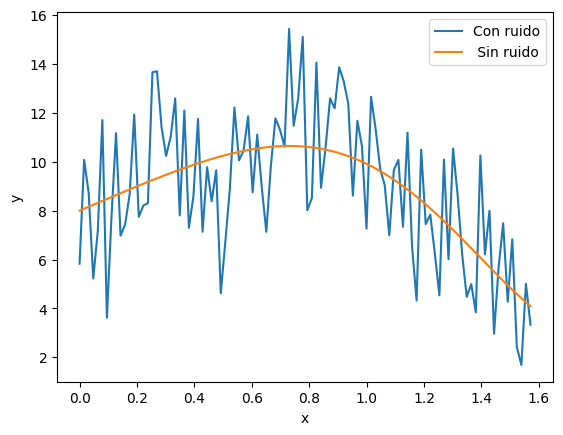

In [286]:
# Definimos el número de datos
N_data = 100

# Creamos un arreglo equiespaciado desde 0 a π/2, con la cantidad de datos definida antes
x = np.linspace(0, np.pi/2, N_data)

# Calculamos f(x) para cada x en el arreglo anterior
y_real = 5 * np.sin(x) + 5 * np.cos(x**2) + 3

# Sumamos a la función anterior un factor de ruido dado por una normal
y_ruido = y_real + np.random.normal(0, 2, N_data)

# Creamos el gráfico de cada versión de la función
plt.plot(x, y_ruido)
plt.plot(x, y_real)

# Añadimos nombres y leyenda
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Con ruido', ' Sin ruido'])

# Mostramos el gráfico
plt.show()

Ahora, de forma similar a lo visto en clases, haremos un ajuste con modelos polinomiales y, utilizando cross-validation, determinaremos el grado del polinomio óptimo a modo de favorecer la capacidad predictiva del modelo.

In [287]:
# Importamos los esenciales :)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [297]:
# Definimos el número de iteraciones que queremos
N_iteraciones = 300

# Creamos un arreglo de ceros, tantos como iteraciones queramos, ya que aquí irán después el error asociado en cada modelo
errores_modelos = np.zeros((10, N_iteraciones))

Ahora, repita el siguiente experimento para realizar cross-validation. Para cada iteración debe hacer lo siguiente:

- Divida el dataset en entrenamiento y testeo (use una proporción adecuada). Utilice la función train_test_split!
- Con el set de entrenamiento ajuste el modelo polinomial (desde el grado 1 al 10). Puede utilizar PolynomialFeatures para generar la matriz de diseño que necesite, use include_bias=True.  
- Evalúe su modelo en los datos de testeo y utilice las predicciones para evaluar el mean_squared_error.
- Guarde el MSE en la matriz de errores.

In [302]:
for i in range(100):
  x_train,x_test,y_train,y_test = train_test_split(x, y_ruido, train_size=0.75) # Dividimos el data set en testeo y entrenamiento
  for j in range(10):
    # Ajustamos el modelo polimonial}
    poly = PolynomialFeatures(degree=j+1, include_bias=True)
    poly_features = poly.fit_transform(x_train.reshape(-1, 1))
    poly_test = poly.fit_transform(x_test.reshape(-1, 1))
    poly_reg_model = LinearRegression()
    poly_reg_model.fit(poly_features, y_train)
    y_predicted = poly_reg_model.predict(poly_test)
    # Calculamos el erro de cada modelo y lo añadimos al arreglo anterior
    errores_modelos[j, i] = mean_squared_error(y_test, y_predicted)

Finalmente, grafique el MSE promedio de las N iteraciones, para cada modelo y decida cuál es el grado óptimo del polinomio que debería utilizar para su modelo.

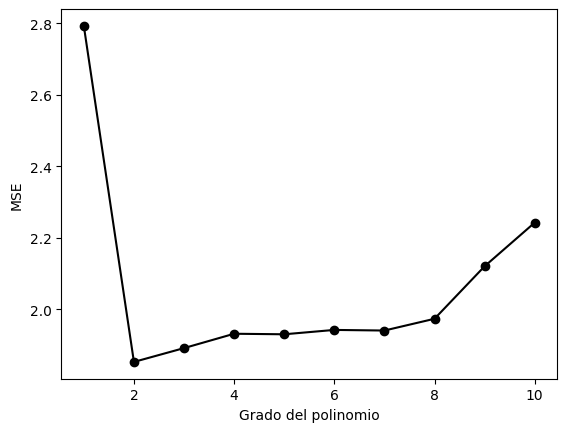

In [303]:
# Calculamos el promedio de los modelos, axis = 1 indica que seleccionamos datos de forma horizontal
promedio_modelos = np.mean(errores_modelos, axis=1)

# Graficamos el error por cada grado polimonial
plt.plot(np.arange(1,11), promedio_modelos, marker = 'o', linestyle='-', color='black')

# Añadimos nombres a los ejes
plt.xlabel('Grado del polinomio')
plt.ylabel('MSE')

# Mostramos el gráfico
plt.show()

El grado óptimo del polinomio es 2.